In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(
    accuracy_score , precision_score,recall_score,
    f1_score,roc_auc_score,roc_curve,classification_report
    )

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:

df  = pd.read_csv(r"D:\DataScience\Datascience Assignment\08 diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Exploratory Data Analysis(EDA)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Cheak Missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Visualizations

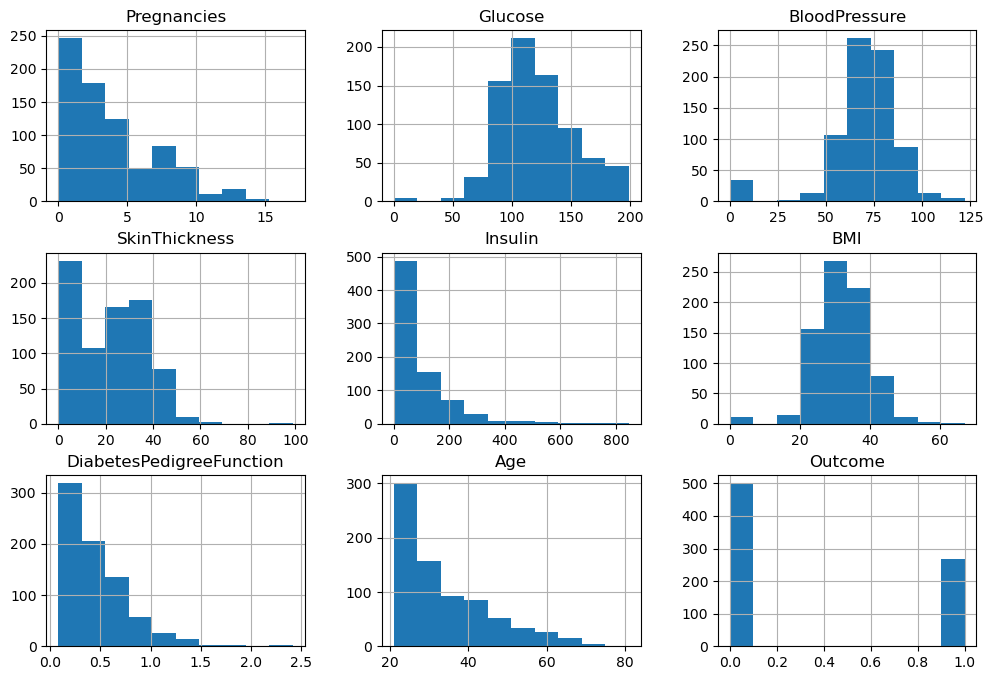

In [10]:
# Histogram
df.hist(figsize=(12,8))
plt.show()

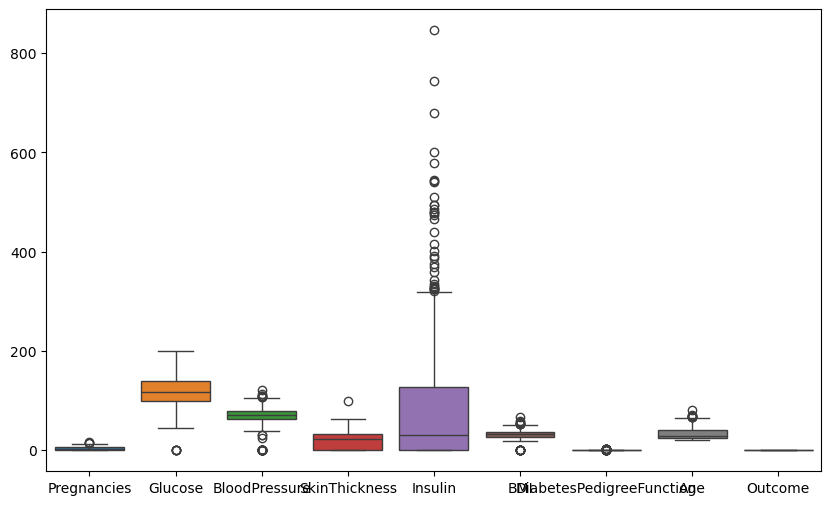

In [11]:
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [12]:
# Correlation Heatmap(SAFE)

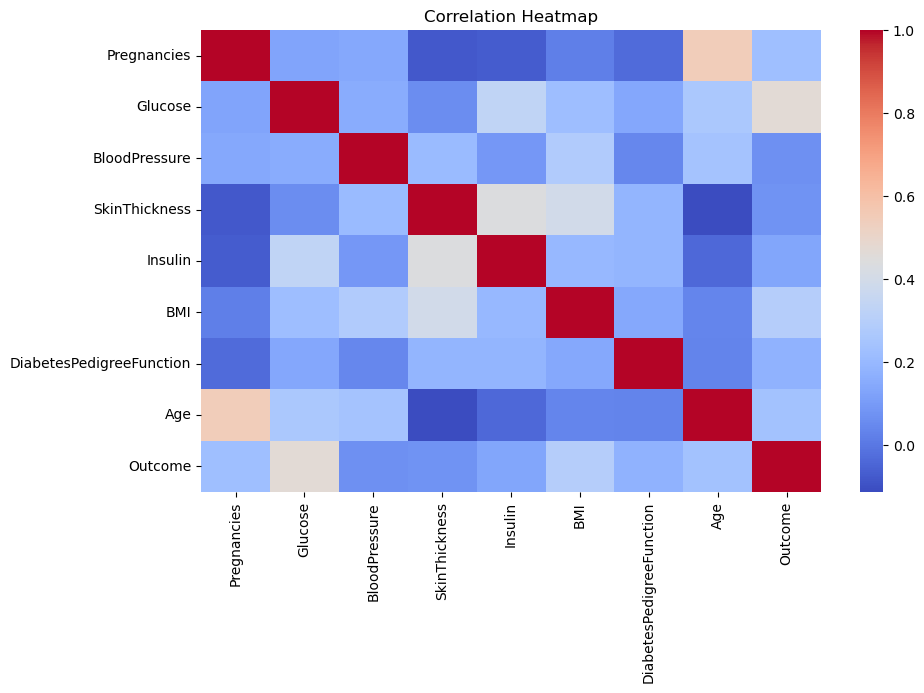

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
#Data Preprocessing

In [15]:
# a) Define X and Y

In [50]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
# Feature Scaling

In [18]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
# Train-Test Split(80-20)

In [20]:
x_train , x_test , y_train , y_test = train_test_split(
    x_scaled ,y ,test_size = 0.2 , random_state = 42)

In [21]:
# Model Building(Logistic Regression)

In [22]:
model = LogisticRegression()
model.fit(x_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
# Model Evaluation

In [24]:
# a) Predictions

In [25]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

In [26]:
# Evaluation Metrics

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test , y_pred))
print("F1 Score :",f1_score(y_test,y_pred))
print("ROC - AUC:",roc_auc_score(y_test,y_prob))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall : 0.6727272727272727
F1 Score : 0.6607142857142857
ROC - AUC: 0.8146923783287419


In [28]:
# Classification Report

In [29]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [30]:
# ROC Curve

In [31]:
fpr , tpr , _ =roc_curve(y_test,y_prob)

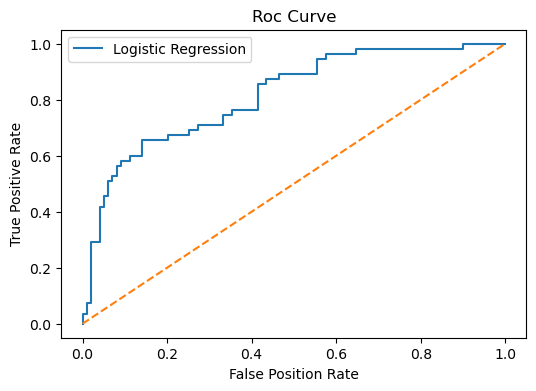

In [32]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr , label ="Logistic Regression")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Position Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.legend()
plt.show()

In [33]:
# inretpretation of Coefficients (in code)

In [34]:
coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_[0]
    })
coef_df.sort_values(by="Coefficient",ascending= False)

,Feature,Coefficient
1,Glucose,1.069330
5,BMI,0.792371
7,Age,0.430362
6,DiabetesPedigreeFunction,0.227094
0,Pregnancies,0.216242
3,SkinThickness,0.047203
4,Insulin,-0.198998
2,BloodPressure,-0.258676


In [35]:
#  Interpretation Logic (Code-Based)

In [39]:
for feature, coef in zip(x.columns, model.coef_[0]):
    if coef > 0:
        print(f"{feature} ↑ → Higher diabetes probability")
    else:
        print(f"{feature} ↑ → Lower diabetes probability")
        
        


Pregnancies ↑ → Higher diabetes probability
Glucose ↑ → Higher diabetes probability
BloodPressure ↑ → Lower diabetes probability
SkinThickness ↑ → Higher diabetes probability
Insulin ↑ → Lower diabetes probability
BMI ↑ → Higher diabetes probability
DiabetesPedigreeFunction ↑ → Higher diabetes probability
Age ↑ → Higher diabetes probability


In [42]:
"""
 Conclusion :-
Logistic Regression was applied to predict diabetes outcomes.
Glucose, BMI, and Age were found to be significant predictors.
The model performed well based on accuracy, recall, and ROC-AUC score and can be deployed using Streamlit for real-time predictions.
"""

'\n Conclusion :-\nLogistic Regression was applied to predict diabetes outcomes.\nGlucose, BMI, and Age were found to be significant predictors.\nThe model performed well based on accuracy, recall, and ROC-AUC score and can be deployed using Streamlit for real-time predictions.\n'

In [46]:

import streamlit as st
import numpy as np
import pickle


In [47]:
st.title("Diabetes Prediction App")

2026-02-03 16:43:55.717 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 16:43:56.516 
  command:

    streamlit run C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-03 16:43:56.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 16:43:56.520 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [51]:
glucose = st.number_input("Glucose")
bmi = st.number_input("BMI")
age = st.number_input("Age")
print(glucose)
print(bmi)
print(age)

2026-02-04 00:45:59.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:45:59.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:45:59.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:45:59.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:45:59.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:45:59.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:45:59.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:45:59.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

0.0
0.0
0.0


In [55]:
if st.button("Predict"):
    input_data = np.array([[glucose, bmi, age]])
    prediction = model.predict(input_data)
    st.write("Diabetes Detected" if prediction[0]==1 else "No Diabetes")
#print(st.button)

2026-02-04 00:47:02.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:47:02.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:47:02.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:47:02.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:47:02.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 00:47:02.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


<bound method ButtonMixin.button of DeltaGenerator()>


In [1]:

# Interview Questions:
# . What is the difference between precision and recall?
"""
Precision tells us, “Out of all the predictions my model said were positive, how many were actually correct?”

Recall tells us, “Out of all the actual positive cases, how many did my model successfully identify?”

In simple terms, precision focuses on correctness, while recall focuses on completeness.

The choice between them depends on the problem—for example, in medical diagnosis recall is more important, 
while in spam detection precision is more important
"""

'\nPrecision tells us, “Out of all the predictions my model said were positive, how many were actually correct?”\n\nRecall tells us, “Out of all the actual positive cases, how many did my model successfully identify?”\n\nIn simple terms, precision focuses on correctness, while recall focuses on completeness.\n\nThe choice between them depends on the problem—for example, in medical diagnosis recall is more important, \nwhile in spam detection precision is more important\n'

In [1]:
# What is cross-validation, and why is it important in binary classification?
"""
Cross-validation helps verify that a binary classification model performs consistently and
reliably on unseen data while reducing overfitting.

Ensures the model generalizes well to unseen data

Prevents overfitting

Provides reliable performance metrics like accuracy, precision, recall, and AUC

Maintains class balance when using stratified cross-validation
"""

'\nCross-validation helps verify that a binary classification model performs consistently and\nreliably on unseen data while reducing overfitting.\n\nEnsures the model generalizes well to unseen data\n\nPrevents overfitting\n\nProvides reliable performance metrics like accuracy, precision, recall, and AUC\n\nMaintains class balance when using stratified cross-validation\n'